# Chapter 6

## Question 10

In which we look at training error vs test error, using simulated data

### (a) Generate a data set with p=20 features, n=1000 observations, and a response as below, where $\beta$ has some elements which are exactly zero.

$$ Y = X\beta + \epsilon $$

In [63]:
import numpy as np
import sklearn.model_selection
import sklearn.linear_model
import itertools
import matplotlib.pyplot as plt
import math
import matplotlib.ticker

In [64]:
X = np.random.normal(size=(1000,20))
eps = np.random.normal(size=1000)
beta = np.asarray([0]*20)
for i in range(1,20,7):
    beta[i] = 10
    
y = X@beta.T + eps

### (b) Split the data into a training set with 100 observations and a test set with 900 observations

In [65]:
X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(X, y, test_size=0.9)


In [66]:
X_test.shape

(900, 20)

### (c) Perform best subset selection on the training set, and plot the training set MSE associated with the best model of each size

In [67]:
def get_linear_reg_score(X,Y):
    """Given X and Y, fit a linear model and return the R^2 score"""
    model = sklearn.linear_model.LinearRegression()
    model.fit(X,Y)
    Rsquared = model.score(X,Y)
    return Rsquared


bestPredictors = []

p = X_train.shape[1]

for k in range(1,p+1):
    print(k)
    bestModelRss = 0
    bestColumns = None
    for subset in itertools.combinations(range(p),k):
        rss = get_linear_reg_score(X_train[:,list(subset)],y_train)
        if rss > bestModelRss:
            bestModelRss = rss
            bestColumns = list(subset) 
    bestPredictors.append(bestColumns)
    

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20


In [68]:
train_mse_vs_k = []
for subset in bestPredictors:
    k = len(subset)
    model = sklearn.linear_model.LinearRegression()
    model.fit(X_train[:,list(subset)],y_train)
    y_pred = model.predict(X_train[:,list(subset)])
    least_squares_mse = sklearn.metrics.mean_squared_error(y_train, y_pred)
    train_mse_vs_k.append([k, least_squares_mse])
    

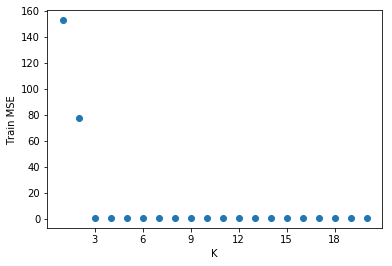

In [69]:
x,y = zip(*train_mse_vs_k)
plt.scatter(x,y)
plt.ylabel("Train MSE")
plt.xlabel("K")
ax = plt.gca()
ax.xaxis.set_major_locator(matplotlib.ticker.MaxNLocator(integer=True))
plt.show()


### (d) Plot the test set MSE associated with the best model of each size

In [70]:
test_mse_vs_k = []
for subset in bestPredictors:
    k = len(subset)
    model = sklearn.linear_model.LinearRegression()
    model.fit(X_train[:,list(subset)],y_train)
    y_pred = model.predict(X_test[:,list(subset)])
    least_squares_mse = sklearn.metrics.mean_squared_error(y_test, y_pred)
    test_mse_vs_k.append([k, least_squares_mse])
    

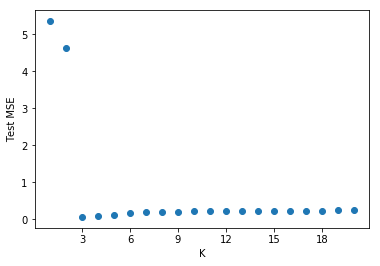

In [73]:
x,y = zip(*test_mse_vs_k)
plt.scatter(x,np.log(y))
plt.ylabel("Test MSE")
plt.xlabel("K")
ax = plt.gca()
ax.xaxis.set_major_locator(matplotlib.ticker.MaxNLocator(integer=True))
plt.show()


### (e) For which model does the test MSE take its lowest value?
### (f) How does this model compare to the true model? Comment on the coefficient values.

In [81]:
print(bestPredictors[2])

k = len(subset)
model = sklearn.linear_model.LinearRegression()
model.fit(X_train[:,bestPredictors[2]],y_train)
print(model.coef_)

[1, 8, 15]
[9.94904962 9.99484432 9.83652137]


The test MSE is minimised for a model with K=3, and these are indeed the three non-zero coefficients, with roughly correct values.

### (g) Create a plot displaying $\sqrt{ \sum_{j=1}^{p}{(\beta_j - \hat{\beta}_j^r )^2} } $ for a range of $r$, where $\hat{\beta}_j^r$ is the jth coefficient estimate for the model with r predictors. Comment.

In [86]:
diffs = []
for predictors in bestPredictors:
    r = len(predictors)
    model = sklearn.linear_model.LinearRegression()
    model.fit(X_train[:,predictors],y_train)
    beta_pred = np.asarray([0]*20, dtype=float)
    for predictor, coef in zip(predictors, model.coef_):
        beta_pred[predictor] = coef
    diff = np.sqrt(np.sum( np.square(beta-beta_pred) ))
    diffs.append(diff)

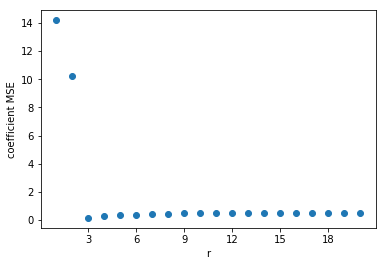

In [87]:
plt.scatter(range(1,21),diffs)
plt.ylabel("coefficient MSE")
plt.xlabel("r")
ax = plt.gca()
ax.xaxis.set_major_locator(matplotlib.ticker.MaxNLocator(integer=True))
plt.show()


The coefficient difference graph takes exactly the same form as the test MSE graph. 